In [1]:
import networkx as nx
import pandas as pd
import powerlaw
import matplotlib.pyplot as plt
import time
import seaborn as sns
import itertools

In [2]:
def top(d: dict) -> list:
    for key, value in sorted(d.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f'{key}: {value}')

In [3]:
# Load the graph using NetworkX
dataset_name = 'Companies'
df = pd.read_csv('data/company_edges.csv')
edges = [tuple(x) for x in df.to_numpy()]

# Creating the graph
G_nx = nx.Graph()
G_nx.add_edges_from(edges)

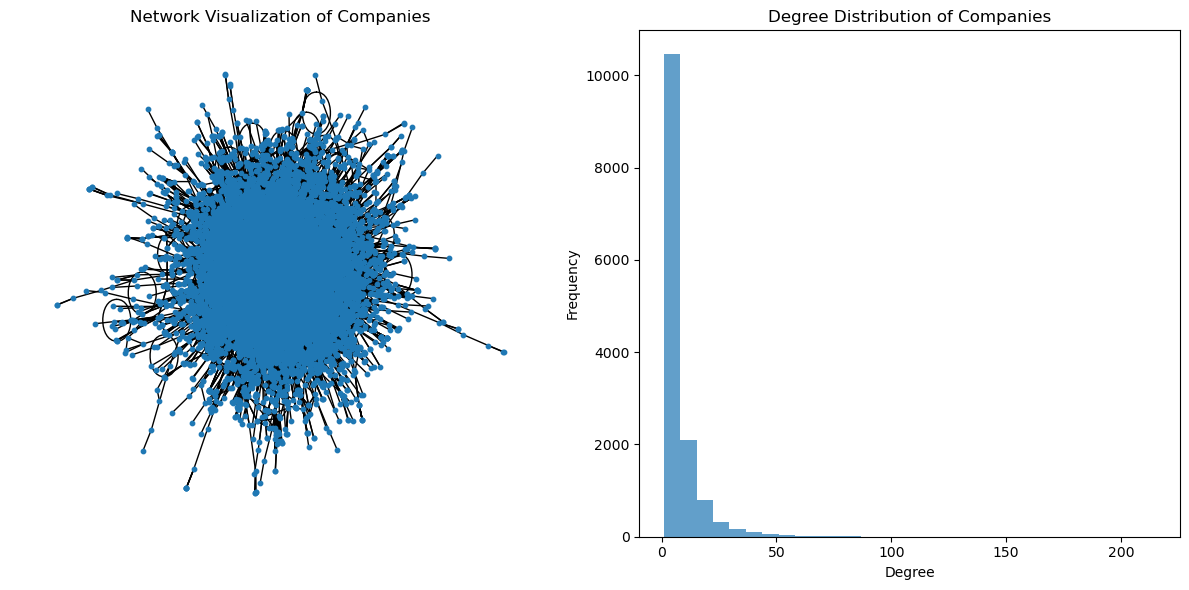

In [4]:
plt.figure(figsize=(12, 6))

# Subplot 1: Network Visualization
plt.subplot(121)
pos = nx.spring_layout(G_nx)
nx.draw(G_nx, node_size=10, pos=pos)
plt.title('Network Visualization of ' + dataset_name)

# Subplot 2: Degree Distribution
plt.subplot(122)
degrees = [d for n, d in G_nx.degree()]
plt.hist(degrees, bins=30, alpha=0.7)
plt.title('Degree Distribution of ' + dataset_name)
plt.xlabel('Degree')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()

In [5]:
# Calculate network properties
degree_distr = sorted(dict(G_nx.degree()).values(), reverse=True)
fit = powerlaw.Fit(degree_distr)

print('Number of nodes:', len(G_nx.nodes()))
print('Number of edges:', len(G_nx.edges()))
print('Min degree:', min(degrees))
print('Max degree:', max(degrees))
print('Average degree:', sum(degrees) / len(degrees))
print('Estimated gamma:', fit.alpha)

Calculating best minimal value for power law fit
Number of nodes: 14113
Number of edges: 52310
Min degree: 1
Max degree: 215
Average degree: 7.413023453553461
Estimated gamma: 3.616731674072018


## Centrality

In [6]:
betweenness_centrality = nx.betweenness_centrality(G_nx)
print('Betweenness Centrality:')
top(betweenness_centrality)

Betweenness Centrality:
9886: 0.056948978296918334
8223: 0.05112654480581488
8396: 0.049575786205879
856: 0.04489220208264501
11380: 0.04210530193545508


In [7]:
closeness_centrality = nx.closeness_centrality(G_nx)
print('Closeness Centrality:')
top(closeness_centrality)

Closeness Centrality:
8396: 0.29136556964116117
11380: 0.2866370117604046
1237: 0.2833336679583191
786: 0.282663995993991
8223: 0.28075201432408237


In [8]:
degree_centrality = nx.degree_centrality(G_nx)
print('Degree Centrality:')
top(degree_centrality)

Degree Centrality:
8396: 0.015235260770975057
11934: 0.015022675736961451
856: 0.01403061224489796
11380: 0.013747165532879819
9886: 0.013109410430839002


In [9]:
eigenvector_centrality = nx.eigenvector_centrality(G_nx)
print('Eigenvector Centrality:')
top(eigenvector_centrality)

Eigenvector Centrality:
4596: 0.23186523124095762
10503: 0.21448543206732193
4535: 0.19984103602439304
12970: 0.1827810165431553
1229: 0.18273849250852242


In [10]:
page_rank_centrality = nx.pagerank(G_nx)
print('Page Rank Centrality:')
top(page_rank_centrality)

Page Rank Centrality:
856: 0.0017840518980129802
11934: 0.0016560979517055551
8396: 0.001627953305989369
9886: 0.0015593344704847507
11380: 0.0014298929199757422


In [11]:
hits_centrality = nx.hits(G_nx)[0]
print('HITS Centrality:')
top(hits_centrality)

HITS Centrality:
4596: 0.024494154180157744
10503: 0.022658436970578965
4535: 0.021111392499446355
12970: 0.01930916021058846
1229: 0.019304665877371445


In [12]:
current_flow_betweenness_centrality = nx.current_flow_betweenness_centrality(G_nx)
print('Current Flow Betweenness:')
top(current_flow_betweenness_centrality)

Current Flow Betweenness:
9886: 0.031463820025456474
856: 0.030537764899598217
8223: 0.02629480660221854
11934: 0.026217538735843825
8396: 0.02573151335192014


In [13]:
load_centrality = nx.load_centrality(G_nx)
print('Load Centrality:')
top(load_centrality)

Load Centrality:
9886: 0.054509906795607986
8223: 0.047325704295425965
8396: 0.046167399407648566
856: 0.04272297706555604
11380: 0.039151470659724005


In [14]:
subgraph_centrality = nx.subgraph_centrality(G_nx)
print('Subgraph Centrality:')
top(subgraph_centrality)

Subgraph Centrality:
4596: 3545539038977.533
10503: 3034033492714.7183
4535: 2633866405907.5796
12970: 2203366759826.241
1229: 2202341190389.9517


In [15]:
harmonic_centrality = nx.harmonic_centrality(G_nx)
print('Harmonic Centrality:')
top(harmonic_centrality)

Harmonic Centrality:
8396: 4567.358333333313
11380: 4474.605952380972
1237: 4409.504761904778
786: 4381.450793650784
8223: 4370.117063492072


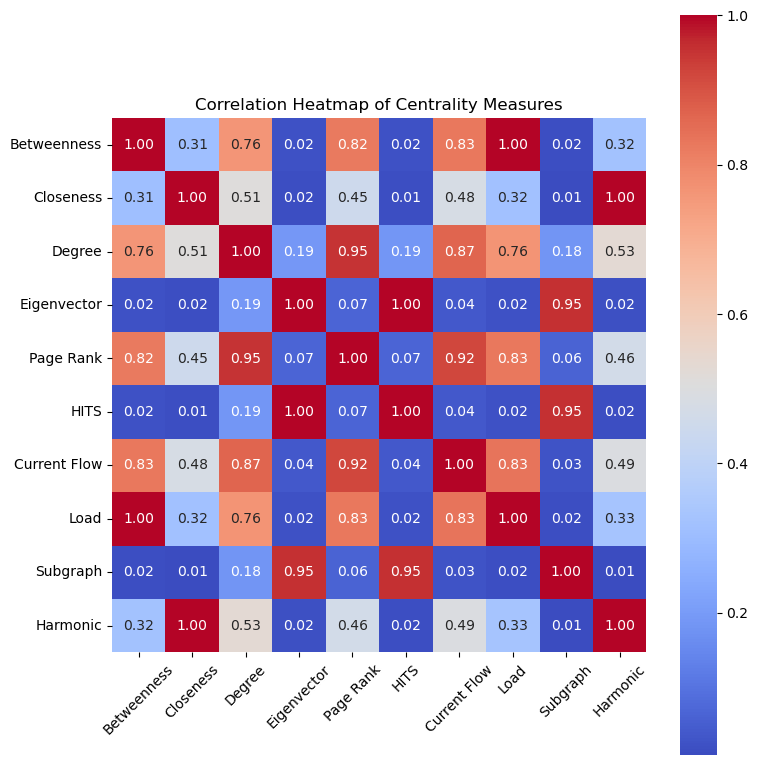

In [16]:
# Convert centrality measures to DataFrames
centrality_measures = {
    'Betweenness': betweenness_centrality,
    'Closeness': closeness_centrality,
    'Degree': degree_centrality,
    'Eigenvector': eigenvector_centrality,
    'Page Rank': page_rank_centrality,
    'HITS': hits_centrality,
    'Current Flow': current_flow_betweenness_centrality,
    'Load': load_centrality,
    'Subgraph': subgraph_centrality,
    'Harmonic': harmonic_centrality
}

# Compute correlations between centrality measures
centrality_df = pd.DataFrame(centrality_measures)
centrality_corr = centrality_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 8))
plt.title('Correlation Heatmap of Centrality Measures')
sns.heatmap(centrality_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Community Detection

In [17]:
communities = {}
modularity_values = {}
coverage_values = {}
performance_values = {}

k = 4
max_size = 4

In [18]:
communities['Bipartitions'] = nx.community.kernighan_lin_bisection(G_nx)
print('No of communities: ', len(communities['Bipartitions']))

modularity_values['Bipartitions'] = nx.community.modularity(G_nx, communities['Bipartitions'])

partition_quality = nx.community.partition_quality(G_nx, communities['Bipartitions'])
coverage_values['Bipartitions'] = partition_quality[0]
performance_values['Bipartitions'] = partition_quality[1]

No of communities:  2


In [19]:
communities['Modularity-based communities'] = nx.community.greedy_modularity_communities(G_nx)
print('No of communities: ', len(communities['Modularity-based communities']))

modularity_values['Modularity-based communities'] = nx.community.modularity(G_nx, communities['Modularity-based communities'])

partition_quality = nx.community.partition_quality(G_nx, communities['Modularity-based communities'])
coverage_values['Modularity-based communities'] = partition_quality[0]
performance_values['Modularity-based communities'] = partition_quality[1]

No of communities:  195


In [20]:
communities['Label propagation'] = nx.community.label_propagation_communities(G_nx)
print('No of communities: ', len(communities['Label propagation']))

modularity_values['Label propagation'] = nx.community.modularity(G_nx, communities['Label propagation'])

partition_quality = nx.community.partition_quality(G_nx, communities['Label propagation'])
coverage_values['Label propagation'] = partition_quality[0]
performance_values['Label propagation'] = partition_quality[1]

No of communities:  1308


In [21]:
communities['Louvain Community Detection'] = nx.community.louvain_communities(G_nx)
print('No of communities: ', len(communities['Louvain Community Detection']))

modularity_values['Louvain Community Detection'] = nx.community.modularity(G_nx, communities['Louvain Community Detection'])

partition_quality = nx.community.partition_quality(G_nx, communities['Louvain Community Detection'])
coverage_values['Louvain Community Detection'] = partition_quality[0]
performance_values['Louvain Community Detection'] = partition_quality[1]

No of communities:  69


In [22]:
communities['Fluid Communities'] = list(nx.community.asyn_fluidc(G_nx, k))
print('No of communities: ', len(communities['Fluid Communities']))

modularity_values['Fluid Communities'] = nx.community.modularity(G_nx, communities['Fluid Communities'])

partition_quality = nx.community.partition_quality(G_nx, communities['Fluid Communities'])
coverage_values['Fluid Communities'] = partition_quality[0]
performance_values['Fluid Communities'] = partition_quality[1]

No of communities:  4


## Output

In [23]:
print("Output:\n")
print('Graph density:', nx.density(G_nx))
print('Clustering coefficient:', nx.average_clustering(G_nx))
print('Assortativity coefficient:', nx.degree_assortativity_coefficient(G_nx))

print("\nCorrelation between centrality measures:")
print(centrality_corr)

print("\n")
print("Modularity of Community Detection Algorithms")
print(modularity_values)
print("Coverage of Community Detection Algorithms")
print(coverage_values)
print("Performance of Community Detection Algorithms")
print(performance_values)

Output:

Graph density: 0.0005252992810057725
Clustering coefficient: 0.2392418380399809
Assortativity coefficient: 0.012977786248196807

Correlation between centrality measures:
              Betweenness  Closeness    Degree  Eigenvector  Page Rank  \
Betweenness      1.000000   0.308847  0.760804     0.024029   0.823244   
Closeness        0.308847   1.000000  0.512011     0.015205   0.447205   
Degree           0.760804   0.512011  1.000000     0.189705   0.952041   
Eigenvector      0.024029   0.015205  0.189705     1.000000   0.067090   
Page Rank        0.823244   0.447205  0.952041     0.067090   1.000000   
HITS             0.022485   0.013659  0.187419     0.999990   0.065142   
Current Flow     0.826034   0.481059  0.866078     0.038516   0.919847   
Load             0.999319   0.316219  0.764691     0.023735   0.829636   
Subgraph         0.015403   0.009546  0.180827     0.954825   0.063138   
Harmonic         0.321696   0.999506  0.529159     0.018830   0.463559   

      

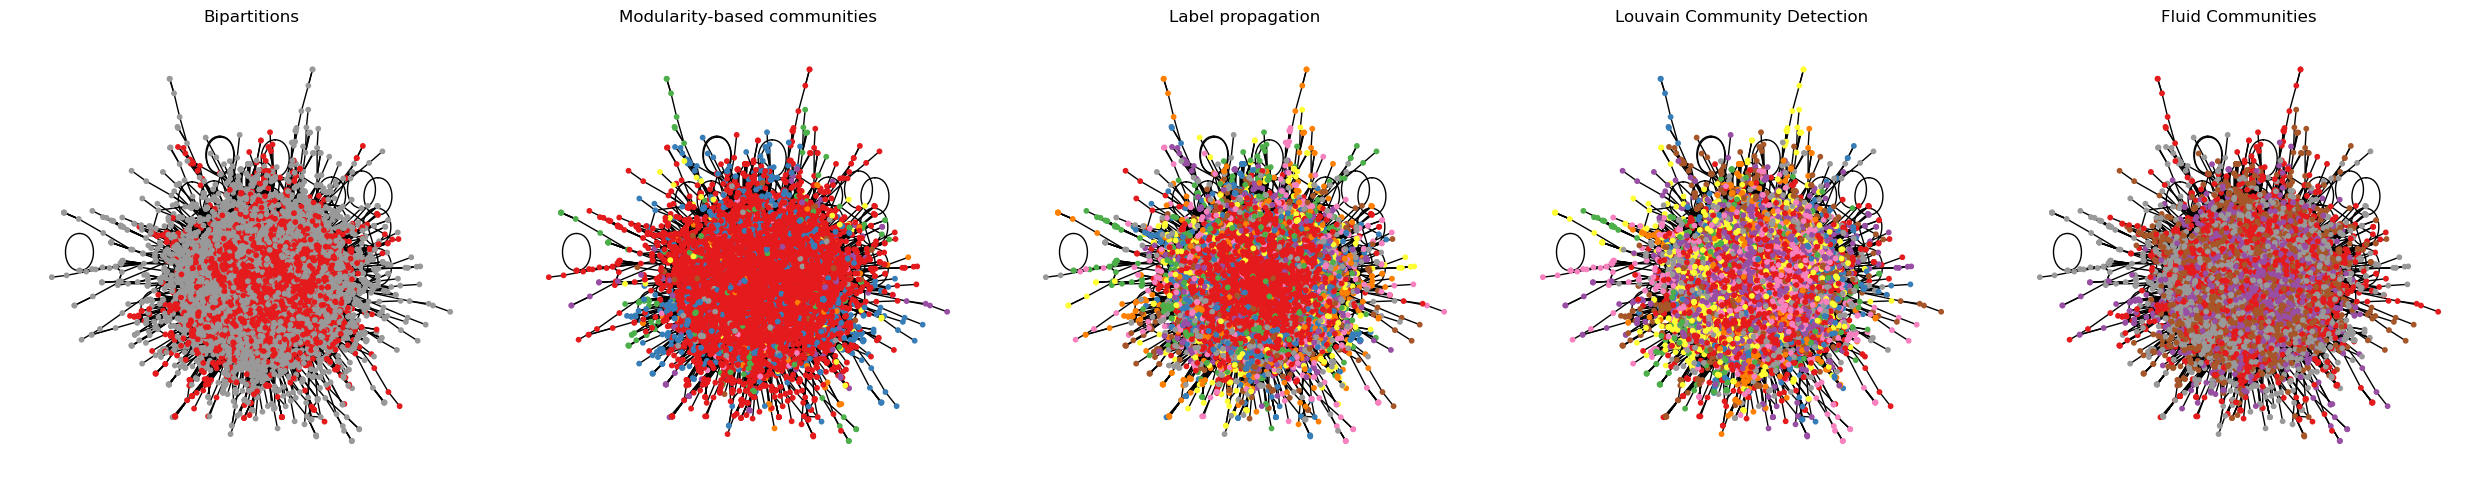

In [24]:
pos = nx.spring_layout(G_nx)
num_algorithms = len(communities)
    
fig, axes = plt.subplots(1, num_algorithms, figsize=(num_algorithms * 5, 5))

for idx, (algorithm, communities) in enumerate(communities.items()):
    ax = axes[idx] if num_algorithms > 1 else axes
    ax.set_title(algorithm)
        
    node_colors = []
    for node in G_nx.nodes:
        for community_idx, community in enumerate(communities, start=1):
            if node in community:
                node_colors.append(community_idx)
                break  # Break once the node is found in a community
        
    nx.draw(G_nx, pos, ax=ax, with_labels=False, node_size=10, node_color=node_colors, cmap=plt.cm.Set1)
    
plt.tight_layout()
plt.show()

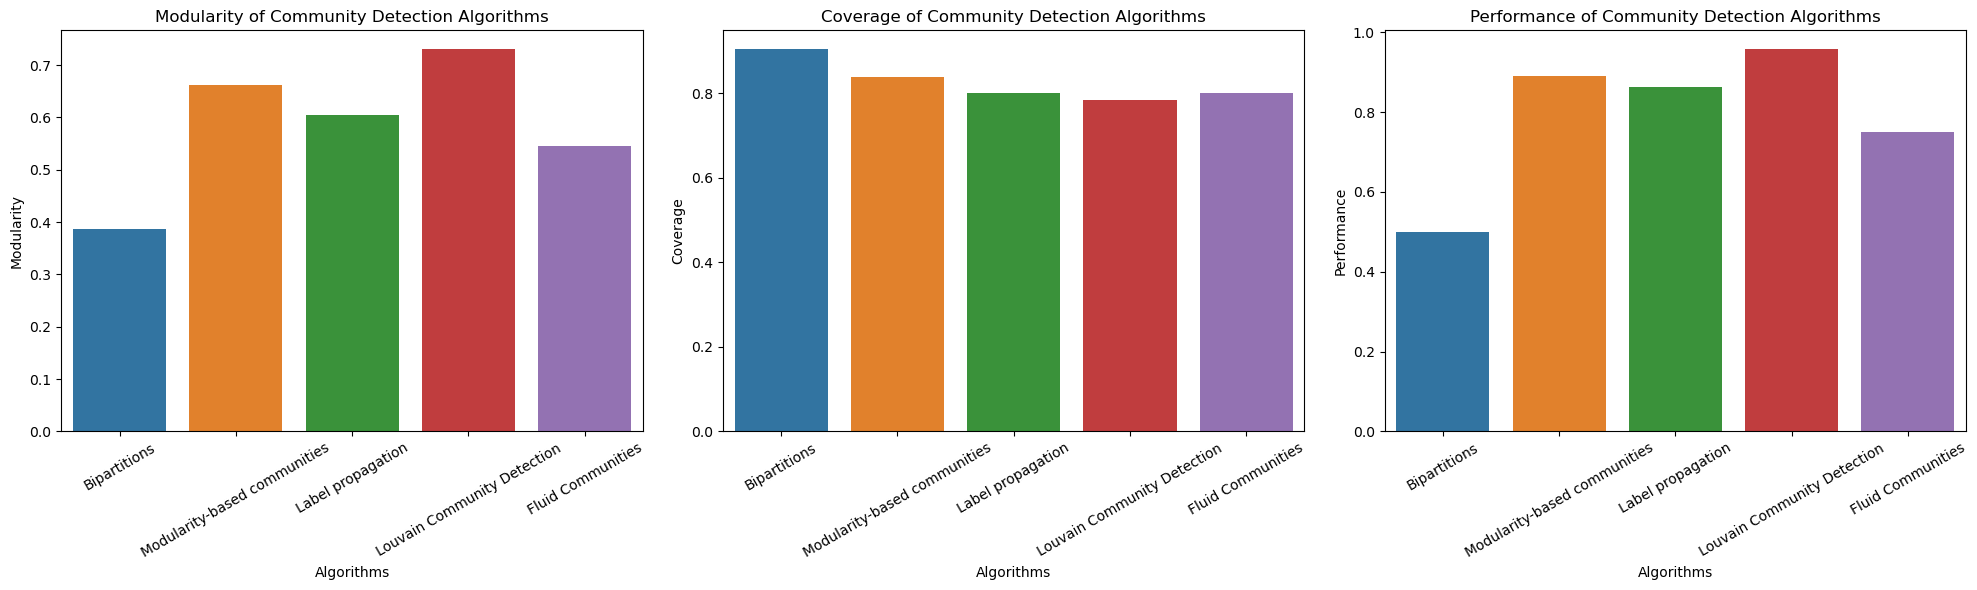

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plotting modularity values
sns.barplot(x=list(modularity_values.keys()), y=list(modularity_values.values()), ax=axes[0])
axes[0].set_title('Modularity of Community Detection Algorithms')
axes[0].set_xlabel('Algorithms')
axes[0].set_ylabel('Modularity')
axes[0].tick_params(axis='x', rotation=30)

# Plotting coverage values
sns.barplot(x=list(coverage_values.keys()), y=list(coverage_values.values()), ax=axes[1])
axes[1].set_title('Coverage of Community Detection Algorithms')
axes[1].set_xlabel('Algorithms')
axes[1].set_ylabel('Coverage')
axes[1].tick_params(axis='x', rotation=30)

# Plotting performance values
sns.barplot(x=list(performance_values.keys()), y=list(performance_values.values()), ax=axes[2])
axes[2].set_title('Performance of Community Detection Algorithms')
axes[2].set_xlabel('Algorithms')
axes[2].set_ylabel('Performance')
axes[2].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()